In [1]:
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [3]:
iris[['petal_length','sepal_length','petal_width','sepal_width']]

,petal_length,sepal_length,petal_width,sepal_width
0,1.4,5.1,0.2,3.5
1,1.4,4.9,0.2,3.0
2,1.3,4.7,0.2,3.2
3,1.5,4.6,0.2,3.1
4,1.4,5.0,0.2,3.6
...,...,...,...,...
145,5.2,6.7,2.3,3.0
146,5.0,6.3,1.9,2.5
147,5.2,6.5,2.0,3.0
148,5.4,6.2,2.3,3.4


In [5]:
import pandas as pd
x = ['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no','no', 'no']
y = ['yes', 'yes', 'no', 'no', 'no', 'no', 'yes','no', 'no']
z = ['yes', 'no', 'yes', 'no','no', 'yes', 'no','no', 'yes']

data = pd.DataFrame({'x': x, 'y': y,'z':z})

In [7]:
rng = np.random.default_rng(123)
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

In [8]:
df

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A
3,item 4,33,A
4,item 5,93,A
5,item 6,45,A
6,item 7,47,A
7,item 8,42,A
8,item 9,53,A
9,item 10,42,A


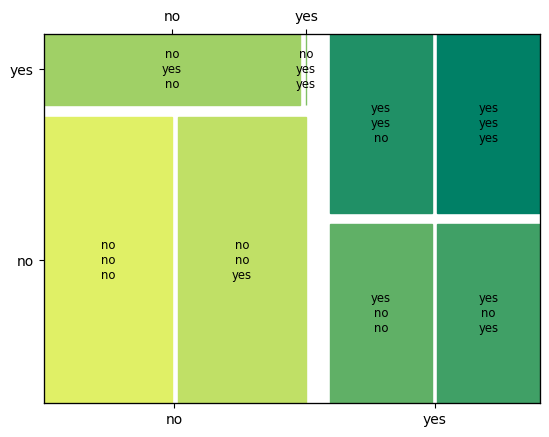

In [6]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

dataset = data

tmp_list = []
for i in range(len(dataset.columns)):
    tmp_list.append(list(set(dataset[dataset.columns[i]])))
    
tmp_01 = list(itertools.product(*tmp_list))
num_categories = len(tmp_01)

cmap = plt.get_cmap('summer')
category_colors = [cmap(i / num_categories) for i in range(num_categories)]

props = {}
for i in range(num_categories):
    props[tmp_01[i]] = {'color':category_colors[i]}

mosaic_data = dataset.groupby(list(dataset.columns)).size().unstack().fillna(0)
mosaic(mosaic_data.stack(), gap=0.05, properties=props)

plt.show()